In [1]:
import numpy as np 
import math as m
import random as rnd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rc('font', size=20)

In [23]:
def advanceNextStep(t):
    directions = [-1, 0, 1]
    coef1, coef2 = rnd.choice(directions), rnd.choice(directions)
    teta = rnd.random() * 2 * np.pi
    return np.cos(teta) * t * V, np.sin(teta) * t * V

In [24]:
def goTroughBorder(x, y):
    if(x < MIN_Z): x = MIN_Z
    if(x > MAX_Z): x = MAX_Z 
    if(y < MIN_Z): y = MIN_Z 
    if(y > MAX_Z): y = MAX_Z 
    return x, y

In [25]:
def move(xPrev, yPrev, t, xCur, yCur):
    xCur  = int(xCur)
    yCur  = int(yCur)
    xPrev = int(xPrev)
    yPrev = int(yPrev)
    
    rhoPrev = z[xPrev][yPrev]
    rhoCur  = z[xCur][yCur]

    if(rhoCur <= rhoPrev):
        t = t + 1
    else: 
        t = t - 1

    delX, delY = advanceNextStep(t)

    xPrev, yPrev = xCur, yCur
    xCur, yCur   = xPrev + delX, yPrev + delY
    xCur, yCur   = goTroughBorder(xCur, yCur)

    return xCur, yCur, t

In [26]:
def drawTrajectory(x0, y0, t, x1, y1):
    nextX, nextY, t = move(x0, y0, t, x1, y1)
    return nextX, nextY, t

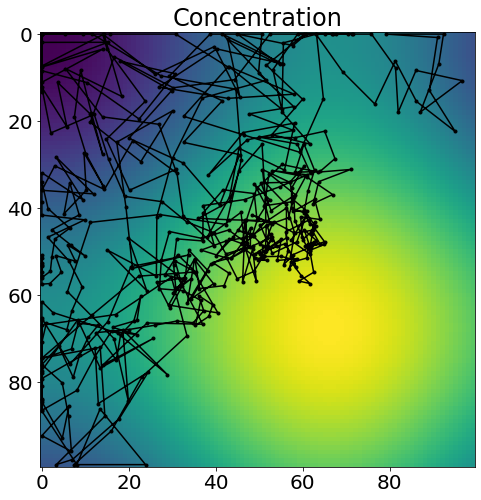

In [35]:
# field
x, y = np.mgrid[-np.pi : np.pi / 2 : 100j,
                -np.pi : np.pi / 2 : 100j]

z = np.sin(x + 1.5) + np.cos(y) 

MIN_Z = 0
MAX_Z = 99

# bacteria's params
V = 1
t = 1
x0, y0 = 50, 50

# initial location
fig, ax = plt.subplots()
fig.set_figwidth(8)    
fig.set_figheight(8)  
plt.plot(x0, y0, marker='.', c='black')

# first step
delX, delY = t * V, t * V
x1, y1 = x0 + delX, y0 + delY

plt.plot(x1, y1, marker='.', c='black')

# draws field
ax.imshow(z, interpolation='none')  #, cmap='plasma')
ax.set_title('Concentration')

# random walk
xs, ys = [x0, x1], [y0, y1]
for i in range(500):
    nextX, nextY, t = drawTrajectory(x0, y0, t, x1, y1)
    xs.append(nextX)
    ys.append(nextY)
    x0, y0 = x1, y1
    x1, y1 = nextX, nextY

    
plt.plot(xs, ys, marker='.', c='black')
plt.show()